Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [8]:
ta=pd.read_csv('/users/rahulkp/downloads/ToyotaCorolla.csv',encoding='latin1')
ta

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [9]:
ta=pd.concat([ta.iloc[:,2:4],ta.iloc[:,6:7],ta.iloc[:,8:9],ta.iloc[:,12:14],ta.iloc[:,15:18]],axis=1)
ta

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [10]:
ta=ta.rename({'Age_08_04':'AGE','cc':'CC','Doors':'DOORS','Gears':'GEARS','Quarterly_Tax':'QT','Weight':'WEIGHT','price':'PRICE'},axis=1)
ta

,Price,AGE,KM,HP,CC,DOORS,GEARS,QT,WEIGHT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [11]:
ta[ta.duplicated()]

,Price,AGE,KM,HP,CC,DOORS,GEARS,QT,WEIGHT
113,24950,8,13253,116,2000,5,5,234,1320


In [12]:
ta=ta.drop_duplicates().reset_index(drop=True)
ta

,Price,AGE,KM,HP,CC,DOORS,GEARS,QT,WEIGHT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [13]:
ta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1435 non-null   int64
 1   AGE     1435 non-null   int64
 2   KM      1435 non-null   int64
 3   HP      1435 non-null   int64
 4   CC      1435 non-null   int64
 5   DOORS   1435 non-null   int64
 6   GEARS   1435 non-null   int64
 7   QT      1435 non-null   int64
 8   WEIGHT  1435 non-null   int64
dtypes: int64(9)
memory usage: 101.0 KB


In [14]:
#checking for missing values
ta.isna().sum()

Price     0
AGE       0
KM        0
HP        0
CC        0
DOORS     0
GEARS     0
QT        0
WEIGHT    0
dtype: int64

# Correlation Matrix

In [15]:
ta.corr()

,Price,AGE,KM,HP,CC,DOORS,GEARS,QT,WEIGHT
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
AGE,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
DOORS,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
GEARS,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
WEIGHT,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


# Scatterplot between variables along with histograms

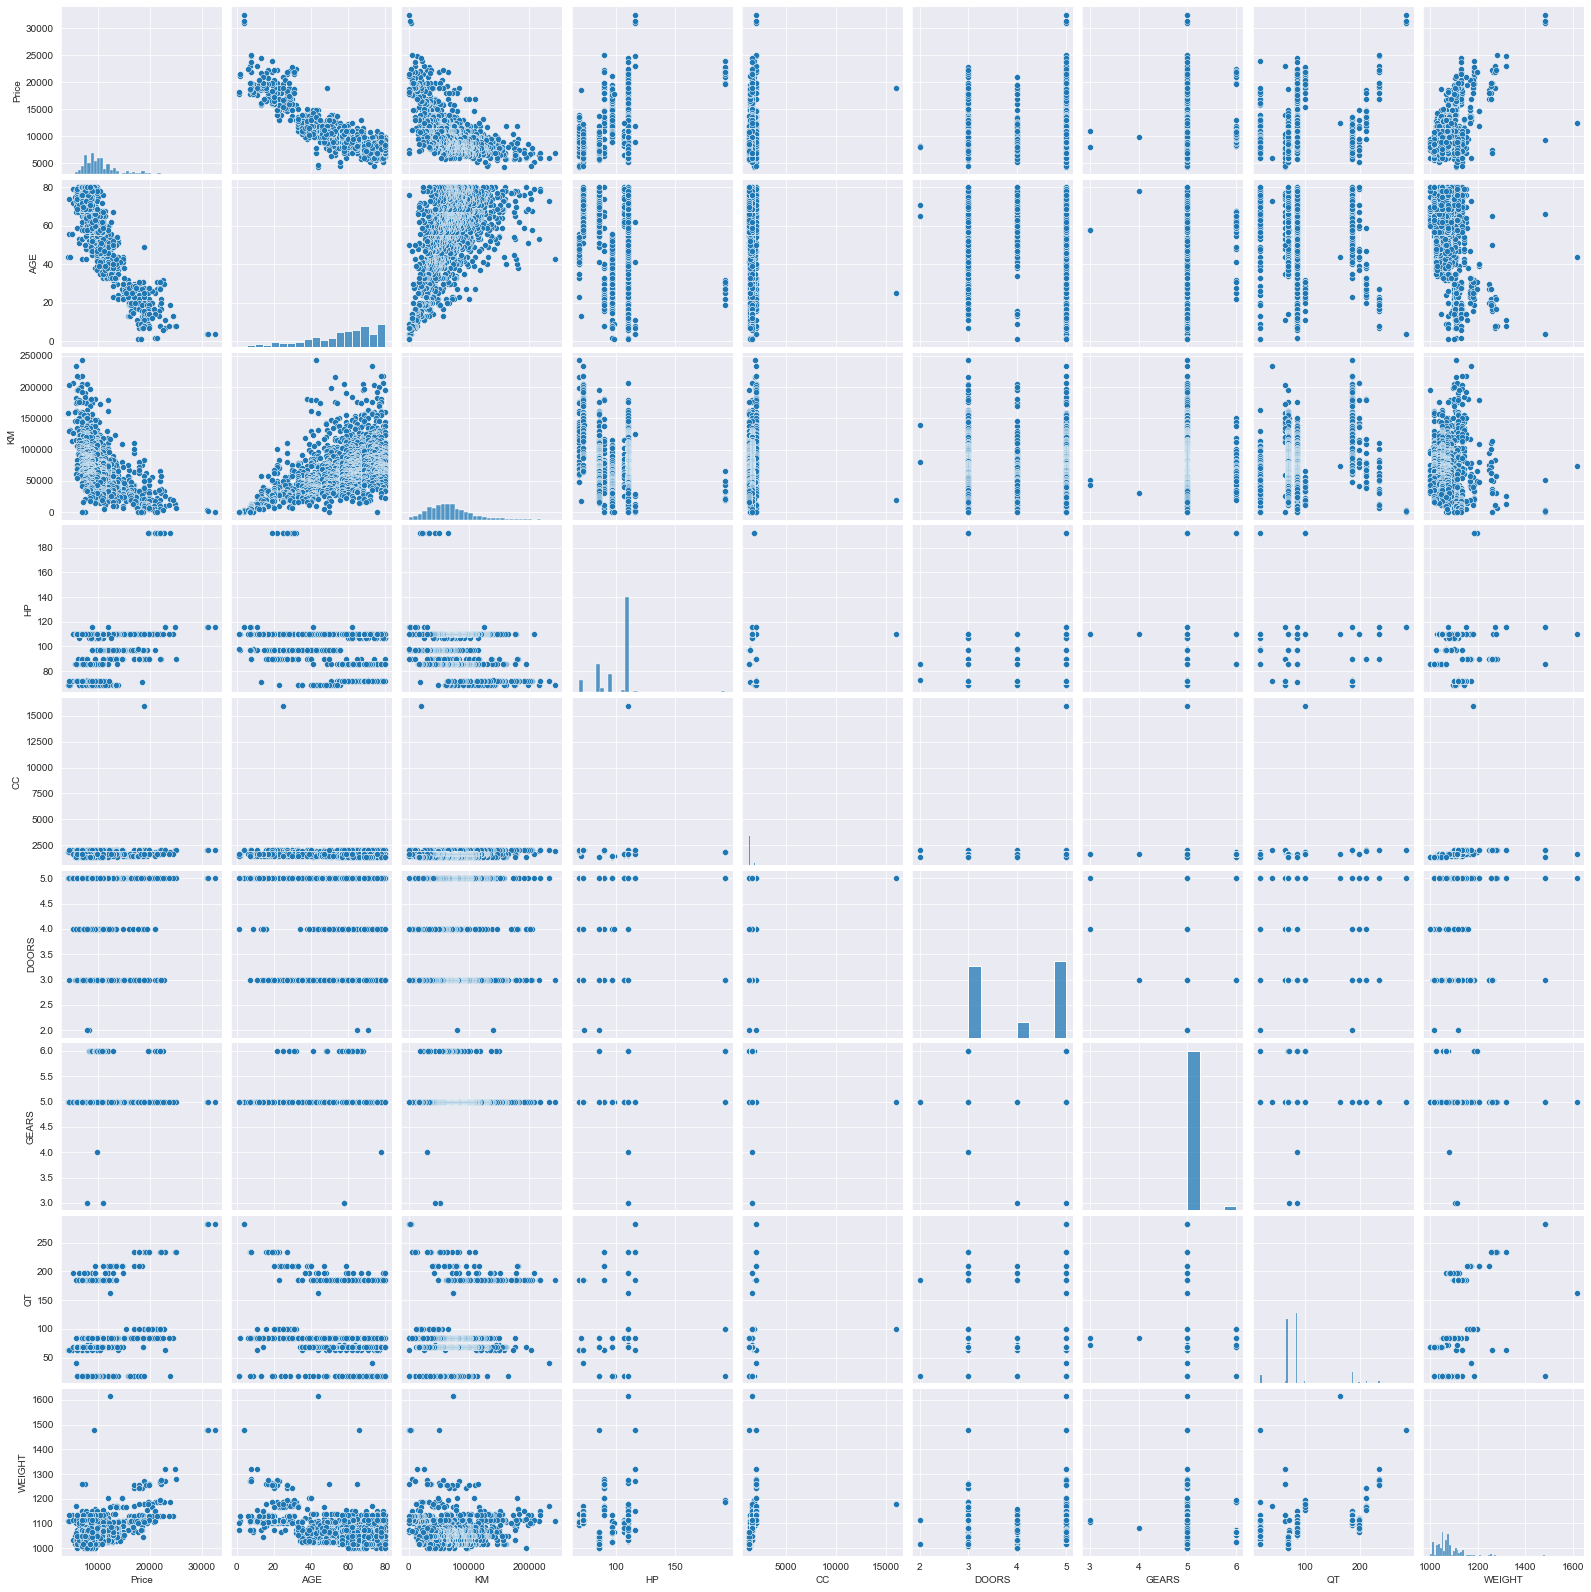

In [16]:
# format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(ta)

# preparing a model

In [17]:
import statsmodels.formula.api as smf
model=smf.ols('Price~AGE+KM+HP+CC+DOORS+GEARS+QT+WEIGHT',data=ta).fit()

In [18]:
model.rsquared

0.8625200256947001

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Sat, 12 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:18:08   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
AGE         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
DOORS         -0.9202     39.988     -0.023      0.982     -79.362      77.522
GEARS        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
WEIGHT        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

here the model is specifying that CC and DOORS p-values are very high . 


In [20]:
# co-efficients
model.params

Intercept   -5472.540368
AGE          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
DOORS          -0.920189
GEARS         597.715894
QT              3.858805
WEIGHT         16.855470
dtype: float64

In [21]:
#T and P-values
print(model.tvalues,'\n',np.round(model.pvalues,5))


Intercept    -3.875273
AGE         -46.551876
KM          -16.552424
HP           11.209719
CC           -1.316436
DOORS        -0.023012
GEARS         3.034563
QT            2.944198
WEIGHT       15.760663
dtype: float64 
 Intercept    0.00011
AGE          0.00000
KM           0.00000
HP           0.00000
CC           0.18824
DOORS        0.98164
GEARS        0.00245
QT           0.00329
WEIGHT       0.00000
dtype: float64


In [22]:
# R-squared values
(model.rsquared,model.rsquared_adj)

(0.8625200256947001, 0.8617487495415147)

we build simple linear regression model for these insignificant values CC and DOORS as specified by the previous model

# Simple Linear Regression Models

In [23]:
model_1=smf.ols('Price~CC',data=ta).fit()

In [24]:
#t and P-values
print(model_1.tvalues,'\n',model_1.pvalues)

Intercept    24.879592
CC            4.745039
dtype: float64 
 Intercept    7.236022e-114
CC            2.292856e-06
dtype: float64


In [25]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Sat, 12 Nov 2022   Prob (F-statistic):           2.29e-06
Time:                        13:18:18   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
CC             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
model_2=smf.ols('Price~DOORS',data=ta).fit()

In [27]:
#t and p values
print(model_2.tvalues,'\n',model_2.pvalues)

Intercept    19.421546
DOORS         7.070520
dtype: float64 
 Intercept    8.976407e-75
DOORS        2.404166e-12
dtype: float64


In [28]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Sat, 12 Nov 2022   Prob (F-statistic):           2.40e-12
Time:                        13:18:21   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
DOORS        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

from the above two models 

we can clearly see that parameters CC and DOORS are Significant, as p values are zero

it means that both the Parameters CC and DOORS are highly CO-RELATED

In [29]:
model_3=smf.ols('Price~CC+DOORS',data=ta).fit()

In [30]:
#t and p values
print(model_3.tvalues,'\n',model_3.pvalues)

Intercept    12.786341
CC            4.268006
DOORS         6.752236
dtype: float64 
 Intercept    1.580945e-35
CC           2.101878e-05
DOORS        2.109558e-11
dtype: float64


In [31]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Sat, 12 Nov 2022   Prob (F-statistic):           2.55e-15
Time:                        13:18:25   Log-Likelihood:                -13756.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6568.3395    513.700     12.786      0.000    5560.655    7576.024
CC             0.9398      0.220      4.268      0.000       0.508       1.372
DOORS        662.3187     98.089      6.752      0.000     469.906     854.732
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Calculating VIF

In [32]:
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_age=smf.ols('AGE~KM+HP+CC+DOORS+GEARS+QT+WEIGHT',data=ta).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_km=smf.ols('KM~AGE+HP+CC+DOORS+GEARS+QT+WEIGHT',data=ta).fit().rsquared
vif_km=1/(1-rsq_km)

rsq_hp=smf.ols('HP~AGE+KM+CC+DOORS+GEARS+QT+WEIGHT',data=ta).fit().rsquared
vif_hp=1/(1-rsq_hp)

rsq_cc=smf.ols('CC~AGE+KM+HP+DOORS+GEARS+QT+WEIGHT',data=ta).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_doors=smf.ols('DOORS~AGE+KM+HP+CC+GEARS+QT+WEIGHT',data=ta).fit().rsquared
vif_doors=1/(1-rsq_doors)

rsq_gears=smf.ols('GEARS~AGE+KM+HP+CC+DOORS+QT+WEIGHT',data=ta).fit().rsquared
vif_gears=1/(1-rsq_gears)

rsq_qt=smf.ols('QT~AGE+KM+HP+CC+DOORS+GEARS+WEIGHT',data=ta).fit().rsquared
vif_qt=1/(1-rsq_qt)

rsq_weight=smf.ols('WEIGHT~AGE+KM+HP+CC+DOORS+GEARS+QT',data=ta).fit().rsquared
vif_weight=1/(1-rsq_weight)

# Storing vif values in a data frame
d1={'Variables':['AGE','KM','HP','CC','DOORS','GEARS','QT','WEIGHT'],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_qt,vif_weight]}
vif_df=pd.DataFrame(d1)
vif_df

,Variables,VIF
0,AGE,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,DOORS,1.155890
5,GEARS,1.098843
6,QT,2.295375
7,WEIGHT,2.487180


none of the variables has a VIF>20 . So all the parameters has to be considered

# Residual Analysis

# Test for Normality of Residuals (Q-Q Plot)

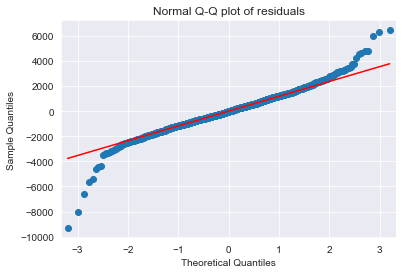

In [33]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagonal line
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [34]:
list(np.where(model.resid>6000))

[array([109, 146, 522])]

In [35]:
list(np.where(model.resid<-6000))

[array([220, 600, 959])]

# Residual plot for Homoscedasticity

In [36]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()


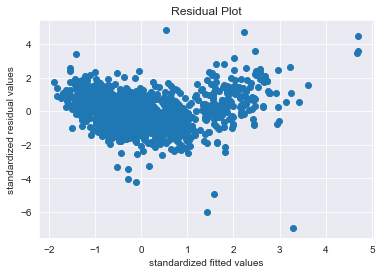

In [37]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

Here the plots are completely scattered,which means they dont have a relationship

# Residuals vs Regressors

eval_env: 1


<function matplotlib.pyplot.show(close=None, block=None)>

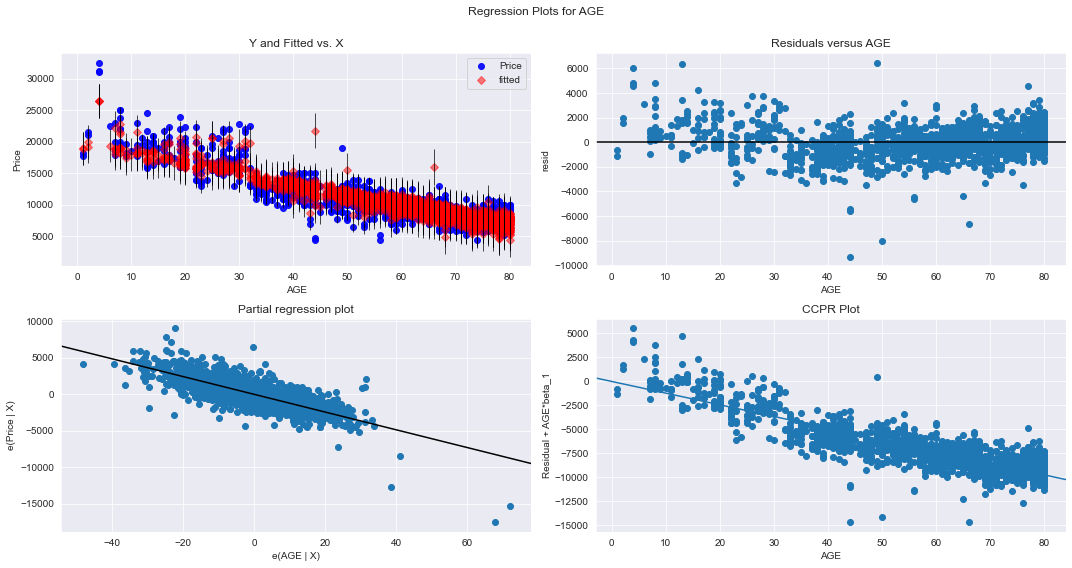

In [38]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'AGE',fig=fig)
plt.show

eval_env: 1


<function matplotlib.pyplot.show(close=None, block=None)>

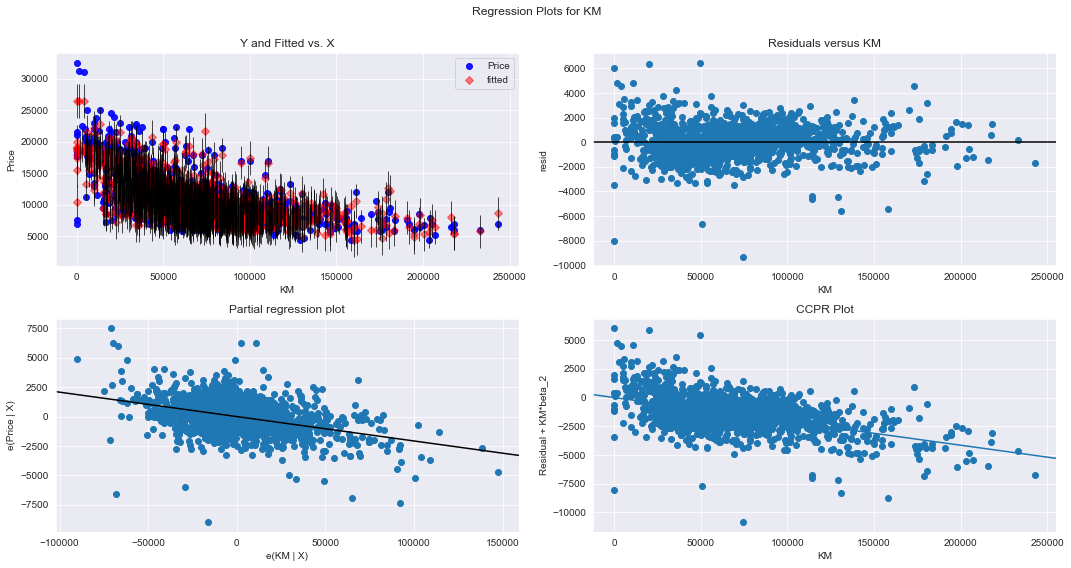

In [39]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show

eval_env: 1


<function matplotlib.pyplot.show(close=None, block=None)>

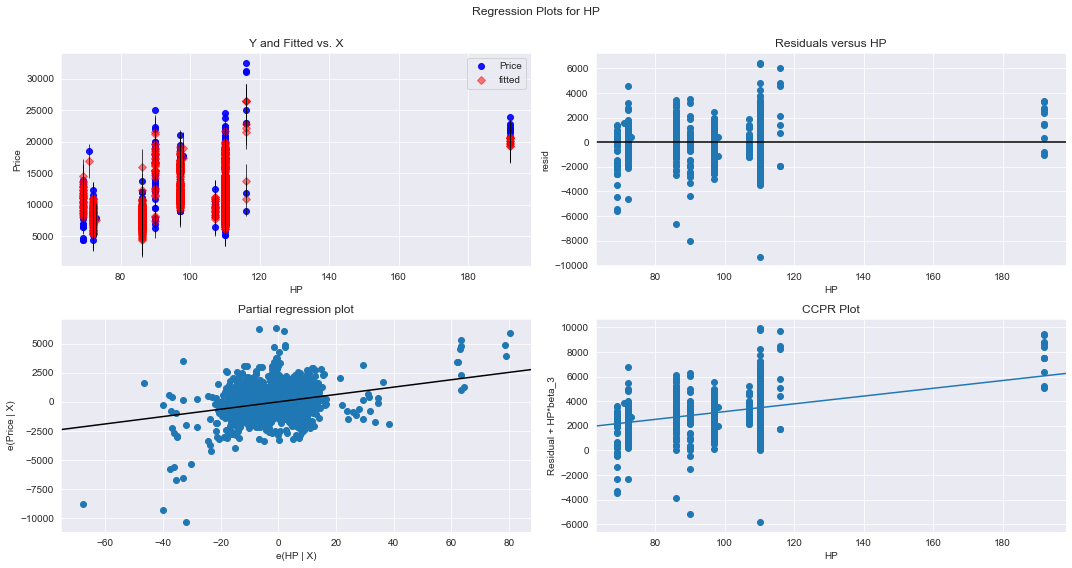

In [40]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show

eval_env: 1


<function matplotlib.pyplot.show(close=None, block=None)>

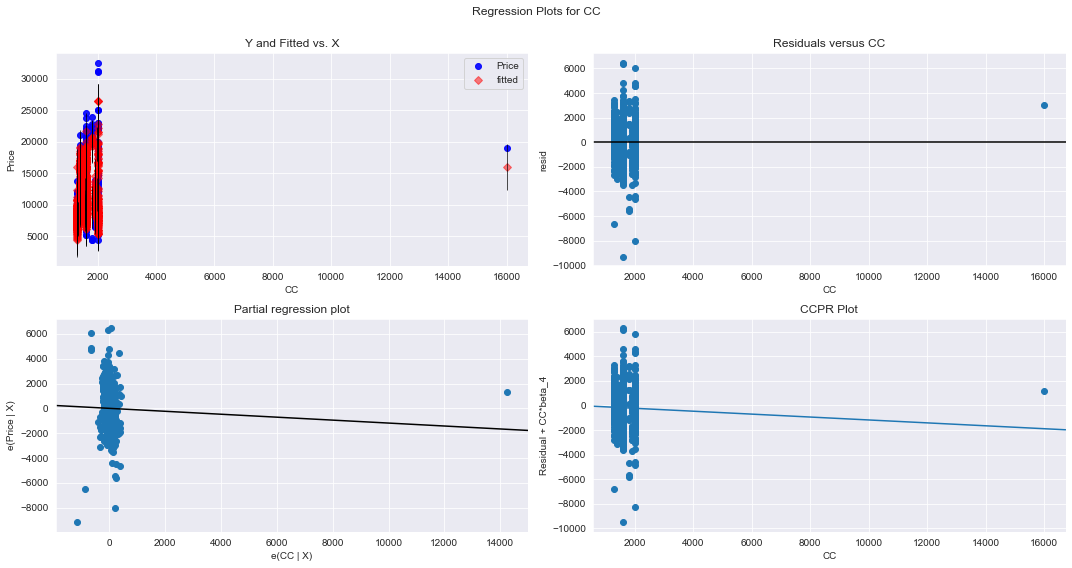

In [41]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show

eval_env: 1


<function matplotlib.pyplot.show(close=None, block=None)>

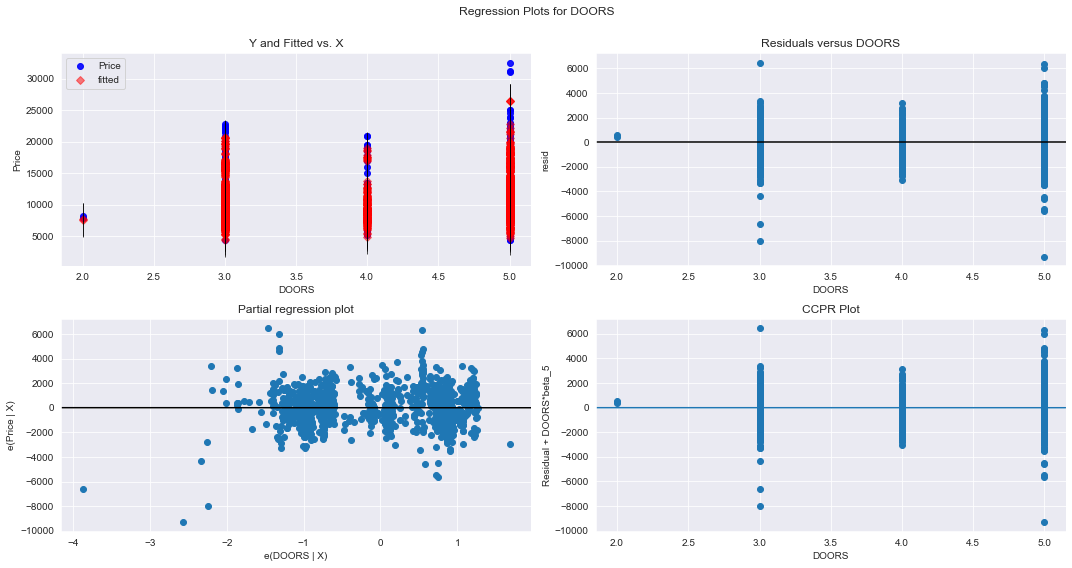

In [42]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'DOORS',fig=fig)
plt.show

eval_env: 1


<function matplotlib.pyplot.show(close=None, block=None)>

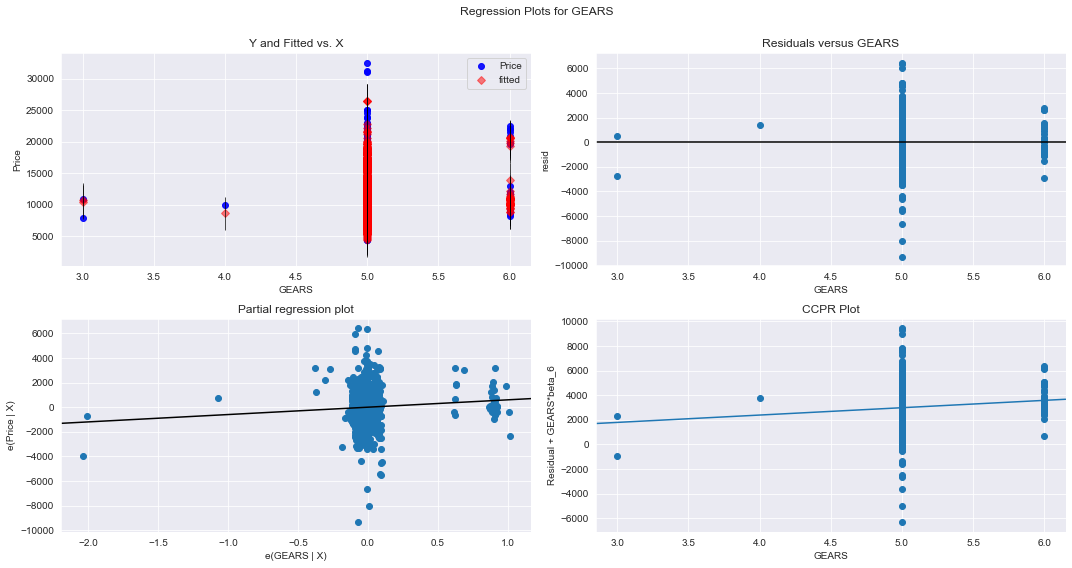

In [43]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'GEARS',fig=fig)
plt.show

eval_env: 1


<function matplotlib.pyplot.show(close=None, block=None)>

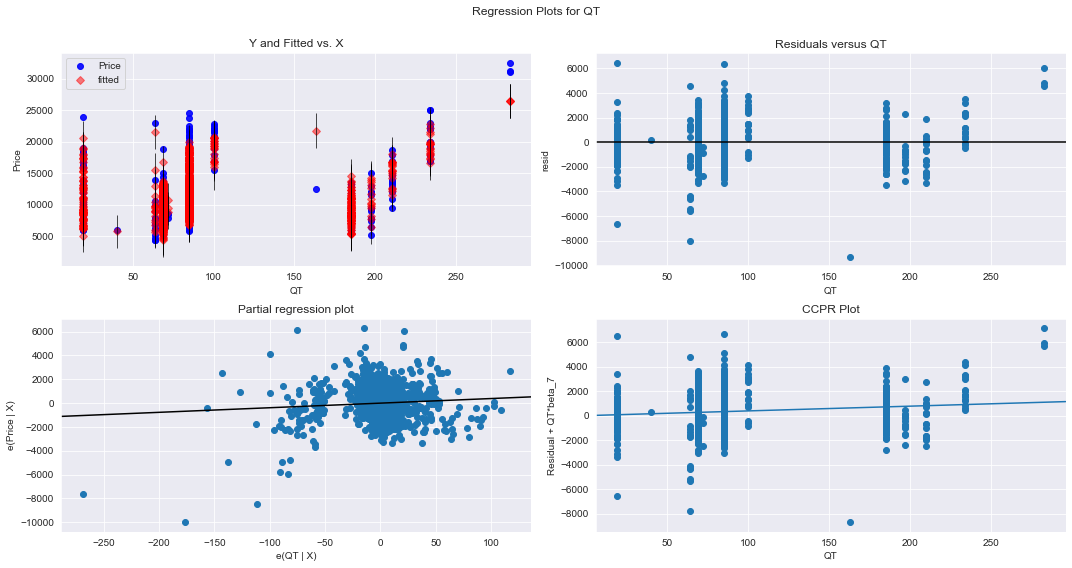

In [44]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show

eval_env: 1


<function matplotlib.pyplot.show(close=None, block=None)>

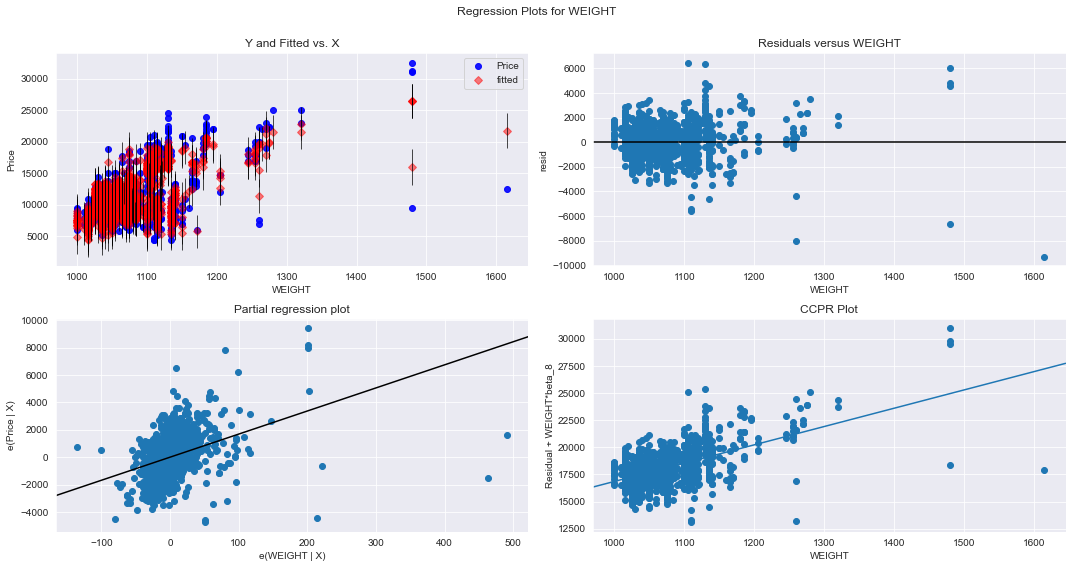

In [45]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'WEIGHT',fig=fig)
plt.show

# Model Deletion Diagnostics

# Detecting Influencers/Outliers

# Cook's Distance

In [46]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

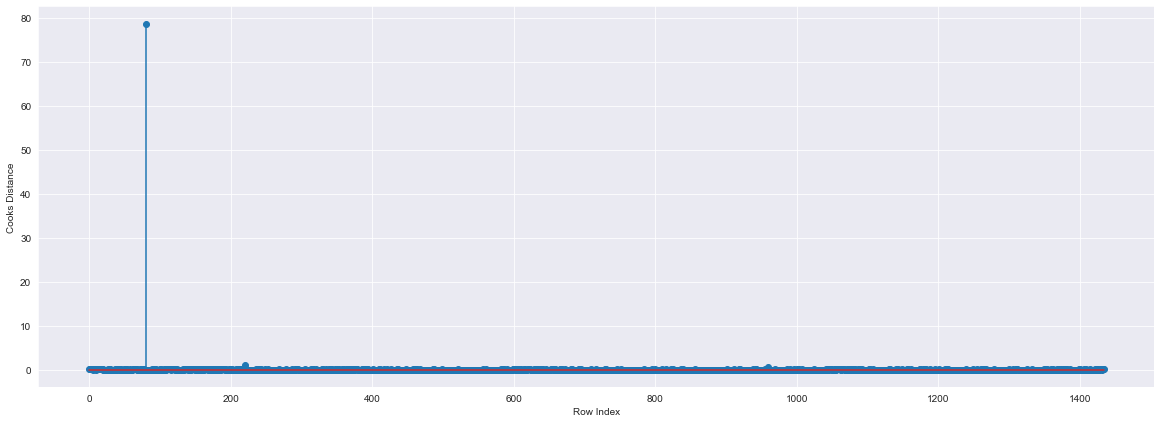

In [47]:
# plotting the influencers values using stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(ta)),np.round(c, 3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [48]:
# index and value of influencer where c is more than 0.5
(np.argmax(c),np.max(c))

(80, 78.7295058224916)

# High Influence Points

<function matplotlib.pyplot.show(close=None, block=None)>

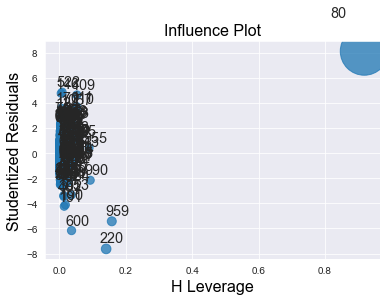

In [49]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show

In [50]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=ta.shape[1]
n=ta.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.020905923344947737

from the above plot it is evident that the data point 80 is influencer

In [51]:
ta[ta.index.isin([80])]

,Price,AGE,KM,HP,CC,DOORS,GEARS,QT,WEIGHT
80,18950,25,20019,110,16000,5,5,100,1180


# improving model

In [52]:
ta_1=ta.copy()
ta_1

,Price,AGE,KM,HP,CC,DOORS,GEARS,QT,WEIGHT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [53]:
# discarding the data point which is influencer and re-asigning the row number
ta_new=ta_1.drop(ta_1.index[[80]],axis=0).reset_index(drop=True)
ta_new

,Price,AGE,KM,HP,CC,DOORS,GEARS,QT,WEIGHT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


# Build Model

In [54]:
final_model=smf.ols('Price~AGE+KM+HP+CC+DOORS+GEARS+QT+WEIGHT',data=ta_new).fit()

In [55]:
(final_model.rsquared,final_model.aic)

(0.8681163912634053, 24669.363894157)

Checking for Outliers/Influencers again 

# Cook's Distance

In [56]:
model_influence_v=final_model.get_influence()
(c_v,_)=model_influence_v.cooks_distance

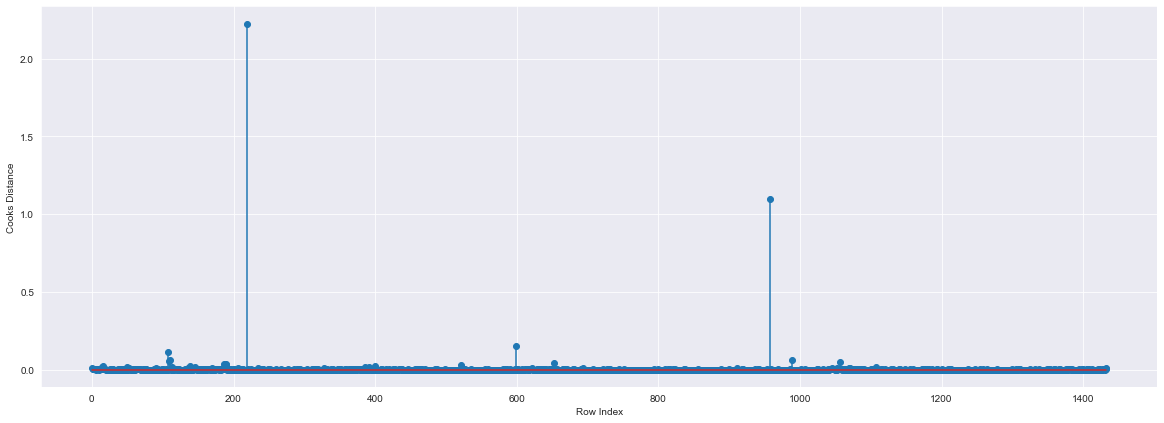

In [57]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(ta_new)),np.round(c_v, 3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [58]:
#index of the data points where c is more than 0.5
(np.argmax(c_v),np.max(c_v))

(219, 2.2253513655270813)

In [59]:
# droping 219 
ta_n=ta_new.drop(ta_new.index[[219]],axis=0).reset_index(drop=True)
ta_n

,Price,AGE,KM,HP,CC,DOORS,GEARS,QT,WEIGHT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


In [60]:
# build the model on new data
finals_model=smf.ols('Price~AGE+KM+HP+CC+DOORS+GEARS+QT+WEIGHT',data=ta_n).fit()


In [61]:
(finals_model.rsquared,finals_model.aic)

(0.8765926307402282, 24557.748263908954)

Again checking for Influencers 

In [62]:
model_influence_V=finals_model.get_influence()
(c_V,_)=model_influence_V.cooks_distance

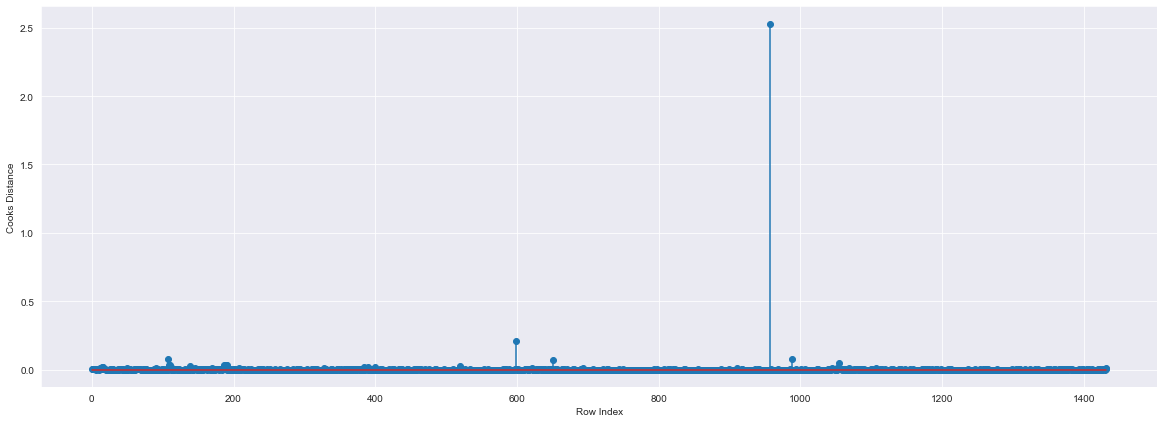

In [63]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(ta_n)),np.round(c_V, 3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [64]:
#index of the data points where c is more than 0.5
(np.argmax(c_V),np.max(c_V))

(957, 2.530779623276654)

In [65]:
# droping 957 
toyota=ta_n.drop(ta_n.index[[957]],axis=0).reset_index(drop=True)
toyota

,Price,AGE,KM,HP,CC,DOORS,GEARS,QT,WEIGHT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1427,7500,69,20544,86,1300,3,5,69,1025
1428,10845,72,19000,86,1300,3,5,69,1015
1429,8500,71,17016,86,1300,3,5,69,1015
1430,7250,70,16916,86,1300,3,5,69,1015


In [66]:
# build the model on new data
finally_model=smf.ols('Price~AGE+KM+HP+CC+DOORS+GEARS+QT+WEIGHT',data=toyota).fit()

In [67]:
(finally_model.rsquared,finally_model.aic)

(0.8839684606741538, 24453.23573612724)

Model Accuracy has been increased

Again looking for influencers

In [68]:
model_influence_VV=finally_model.get_influence()
(c_VV,_)=model_influence_VV.cooks_distance

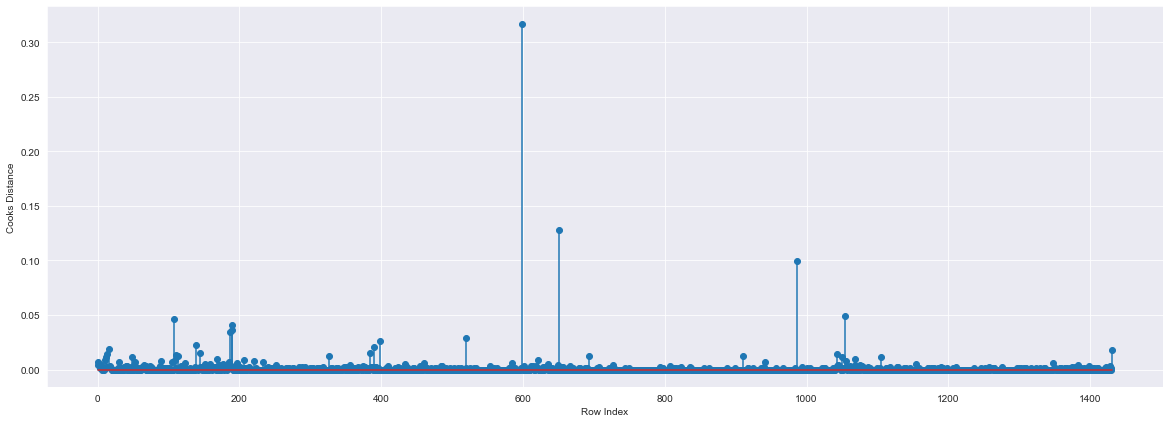

In [69]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyota)),np.round(c_VV, 3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [70]:
#index of the data points where c is more than 0.5
(np.argmax(c_VV),np.max(c_VV))

(598, 0.31689035401452564)

In [71]:
# droping 598
toyota1=toyota.drop(toyota.index[[598]],axis=0).reset_index(drop=True)
toyota1

,Price,AGE,KM,HP,CC,DOORS,GEARS,QT,WEIGHT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1426,7500,69,20544,86,1300,3,5,69,1025
1427,10845,72,19000,86,1300,3,5,69,1015
1428,8500,71,17016,86,1300,3,5,69,1015
1429,7250,70,16916,86,1300,3,5,69,1015


In [72]:
# build the model on new data
finallyy_model=smf.ols('Price~AGE+KM+HP+CC+DOORS+GEARS+QT+WEIGHT',data=toyota1).fit()

In [73]:
(finallyy_model.rsquared,finallyy_model.aic)

(0.8882395145171204, 24382.707627340682)

looking for influencers,Again !!

In [74]:
model_influence_VVV=finallyy_model.get_influence()
(c_VVV,_)=model_influence_VVV.cooks_distance

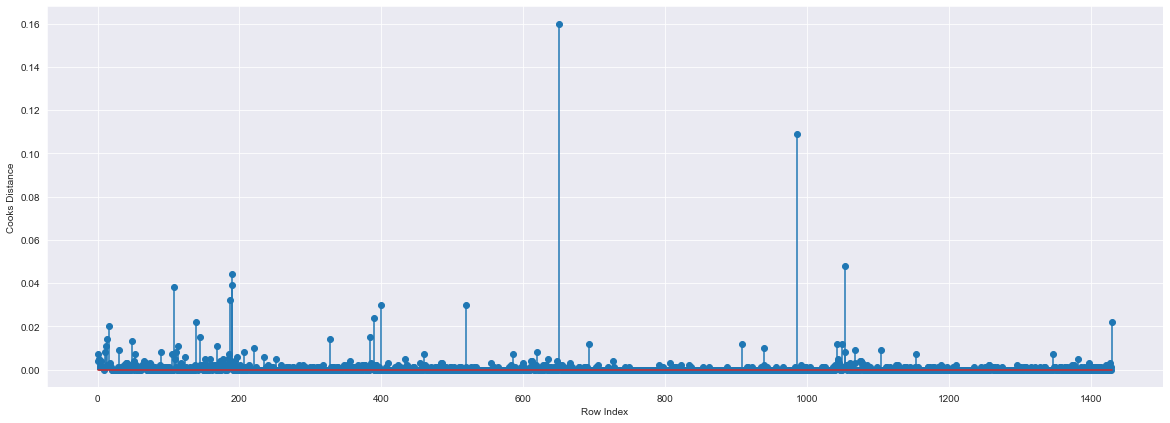

In [75]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyota1)),np.round(c_VVV, 3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [76]:
#index of the data points where c is more than 0.5
(np.argmax(c_VVV),np.max(c_VVV))

(650, 0.16028069686041224)

In [77]:
# droping 650
toyota11=toyota1.drop(toyota1.index[[650]],axis=0).reset_index(drop=True)
toyota11

,Price,AGE,KM,HP,CC,DOORS,GEARS,QT,WEIGHT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1425,7500,69,20544,86,1300,3,5,69,1025
1426,10845,72,19000,86,1300,3,5,69,1015
1427,8500,71,17016,86,1300,3,5,69,1015
1428,7250,70,16916,86,1300,3,5,69,1015


In [78]:
finallyyy_model=smf.ols('Price~AGE+KM+HP+CC+DOORS+GEARS+QT+WEIGHT',data=toyota11).fit()

In [79]:
(finallyyy_model.rsquared,finallyyy_model.aic)

(0.8902571486612915, 24339.53627877803)

looking for influencers/outliers again

In [80]:
model_influence_VVVV=finallyyy_model.get_influence()
(c_VVVV,_)=model_influence_VVVV.cooks_distance

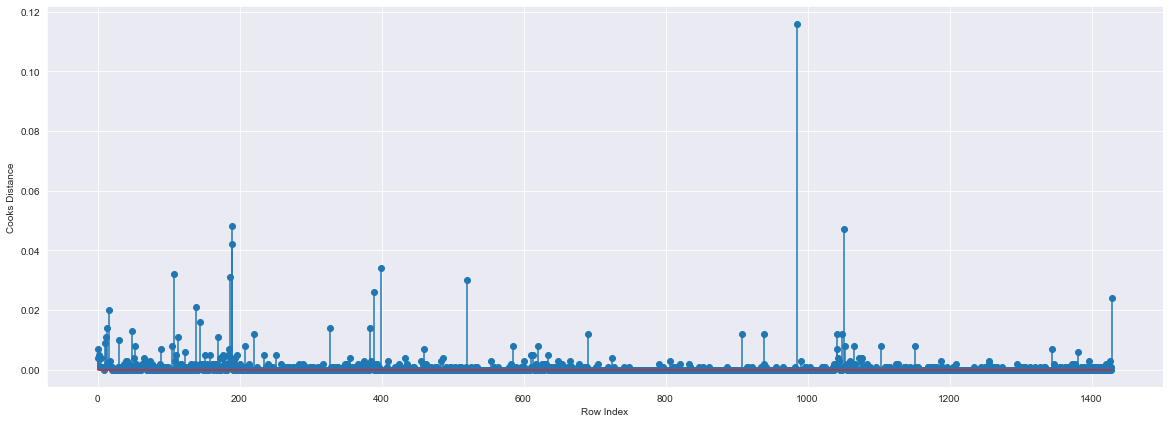

In [81]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyota11)),np.round(c_VVVV, 3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [82]:
#index of the data points where c is more than 0.5
(np.argmax(c_VVVV),np.max(c_VVVV))

(985, 0.11627991877786244)

In [83]:
# droping 985
toyota111=toyota11.drop(toyota11.index[[985]],axis=0).reset_index(drop=True)
toyota111

,Price,AGE,KM,HP,CC,DOORS,GEARS,QT,WEIGHT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1424,7500,69,20544,86,1300,3,5,69,1025
1425,10845,72,19000,86,1300,3,5,69,1015
1426,8500,71,17016,86,1300,3,5,69,1015
1427,7250,70,16916,86,1300,3,5,69,1015


In [84]:
ffinallyyy_model=smf.ols('Price~AGE+KM+HP+CC+DOORS+GEARS+QT+WEIGHT',data=toyota111).fit()

In [85]:
(ffinallyyy_model.rsquared,ffinallyyy_model.aic)

(0.8909888960319987, 24313.37698077585)

There isnt much of a difference in model accuracy and its fair enough that we have removed the influencer data point which were causing much of a trouble

As we can see we got an R-Square value of 89.09 from 86.3 after removing data outliers

# Predicting for new data

In [5]:
# New Data Prediction
new_data=pd.DataFrame({'AGE':22,'KM':50000,'HP':100,'CC':3000,'DOORS':5,'GEARS':5,'QT':100,'WEIGHT':1100},index=[0])
new_data

,AGE,KM,HP,CC,DOORS,GEARS,QT,WEIGHT
0,22,50000,100,3000,5,5,100,1100


In [86]:
# Manual Prediction of Price
finallyyy_model.predict(new_data)

0    10295.597961
dtype: float64

In [88]:
#prediction for the data with removal of outliers/influencers
a=ffinallyyy_model.predict(toyota111)
b=pd.DataFrame(a)
b

,0
0,16341.105289
1,15885.384177
2,16324.561426
3,15995.766877
4,15894.217599
...,...
1424,9172.567280
1425,8535.485860
1426,8679.503791
1427,8790.437118


In [90]:
b=b.rename({0:'NEW PRICE'},axis=1)
b

,NEW PRICE
0,16341.105289
1,15885.384177
2,16324.561426
3,15995.766877
4,15894.217599
...,...
1424,9172.567280
1425,8535.485860
1426,8679.503791
1427,8790.437118
